In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import cv2

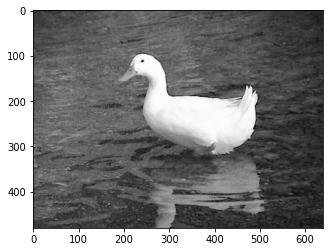

In [3]:
img = cv2.imread('source.png')
plt.imshow(img)

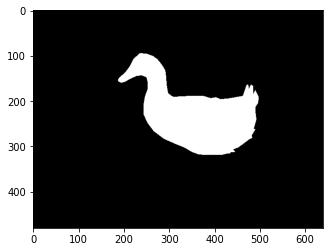

In [19]:
gt = cv2.imread('gt.png') > 128
plt.imshow(gt.astype(float))

In [29]:
def threshold(thresh):
    res = img > thresh
    true_pos = np.sum(res & gt)
    false_pos = np.sum(res & ~gt)
    true_neg = np.sum(~res & ~gt)
    false_neg = np.sum(~res & gt)
    true_pos_rate = true_pos / (true_pos + false_neg)
    false_pos_rate = false_pos / (false_pos + true_neg)
    return true_pos_rate, false_pos_rate

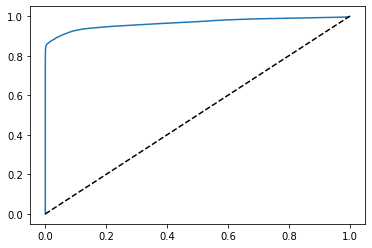

In [39]:
threshold_roc = np.array([threshold(i) for i in range(256)])
tp = threshold_roc[:, 0]
fp = threshold_roc[:, 1]
plt.plot(fp, tp)
plt.plot([0, 1], [0, 1], 'k--')

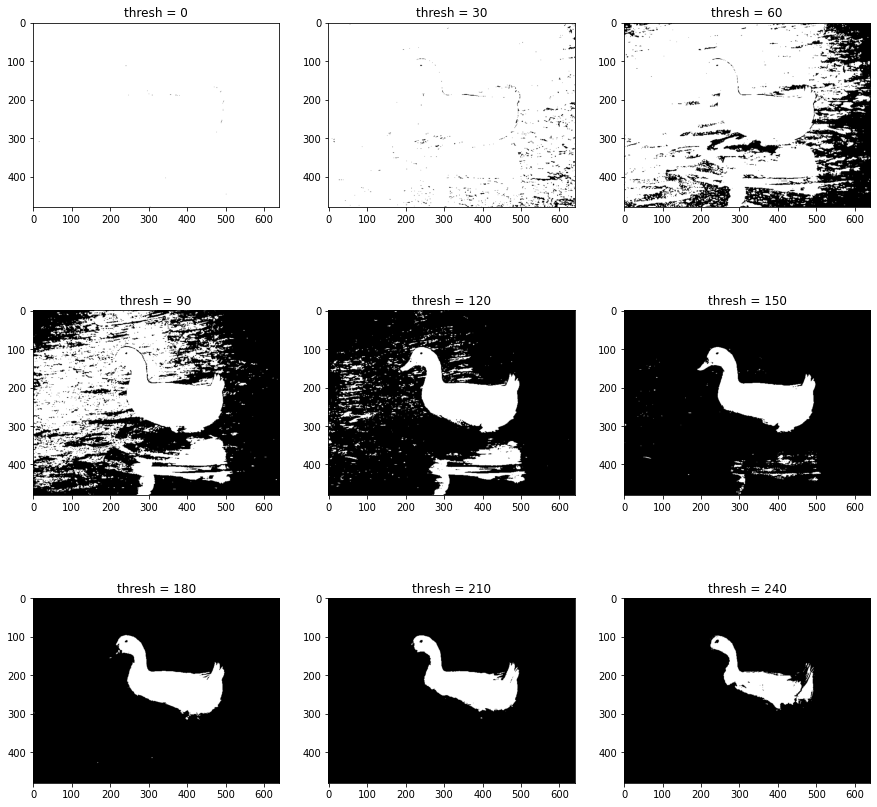

In [51]:
_, plots = plt.subplots(3, 3, figsize=(15, 15))
plots = plots.flatten()
for i, thresh in enumerate(range(0, 256, 30)):
    plots[i].imshow((img > thresh).astype(float))
    plots[i].set_title('thresh = {}'.format(thresh))